In [1]:
import pandas as pd

# Exportamos datos

data_xy = pd.read_csv('csv/DataFinal.csv')

# 1. Preprocesado de los datos

Mapeamos los valores de posiciones a valores numéricos.

In [ ]:
unique_values = data_xy['Posicion'].unique()
print(unique_values)

['DL' 'DF' 'CC,DL' 'DL,CC' 'DF,CC' 'CC' 'CC,DF' 'PO' 'DF,DL' 'DL,DF']


La idea es crear cuatro variables binarias nuevas, que indiquen si el jugador juega o no es esa posición.

In [ ]:
# Codificamos las posiciones
data_xy['Posicion_1'] = data_xy['Posicion'].str.contains('PO') # Verdadero si el jugador es portero
data_xy['Posicion_2'] = data_xy['Posicion'].str.contains('DF') # Verdadero si el jugador es defensa
data_xy['Posicion_3'] = data_xy['Posicion'].str.contains('CC') # Verdadero si el jugador es centrocampista
data_xy['Posicion_4'] = data_xy['Posicion'].str.contains('DL') # Verdadero si el jugador es delantero

data_xy.head()

,Jugador,Edad,Temporada,Posicion,Valor liga ini,Partidos,Titularidades,Minutos,Goles,Asistencias,...,Salario semanal,Valor liga fin,Posicion liga ini,Posicion liga fin,Valor equipo ini,Valor equipo fin,Posicion_1,Posicion_2,Posicion_3,Posicion_4
0,Aaron Connolly,19.0,2019,DL,5123.0,24.0,14.0,1258.0,3.0,1.0,...,31990.0,5123.0,15.0,15.0,200.78,200.78,False,False,False,True
1,Adam Webster,24.0,2019,DF,5123.0,31.0,31.0,2668.0,3.0,1.0,...,48519.0,5123.0,15.0,15.0,200.78,200.78,False,True,False,False
2,Alexis Mac Allister,20.0,2019,"CC,DL",5123.0,9.0,4.0,352.0,0.0,0.0,...,42653.0,5123.0,15.0,15.0,200.78,200.78,False,False,True,True
3,Alireza Jahanbakhsh,25.0,2019,"DL,CC",5123.0,10.0,3.0,311.0,2.0,0.0,...,69312.0,5123.0,15.0,15.0,200.78,200.78,False,False,True,True
4,Bernardo,24.0,2019,"DF,CC",5123.0,14.0,7.0,679.0,0.0,0.0,...,34656.0,5123.0,15.0,15.0,200.78,200.78,False,True,True,False


Nos quedamos solo con los centrocampistas.

In [3]:
data_xy = data_xy[data_xy['Posicion_3'] == True]

Eliminamos las características que tienen que ver con porteros, así como la posición, ya que ahora solo tenemos una.

In [4]:
data_xy = data_xy.drop(['Posicion', 'Goles encajados', 'Disparos recibidos', 'Salvadas', 'Porterias a cero', 
                                    'Penaltis en contra', 'Penaltis encajados', 'Penaltis detenidos', 'Penaltis fallados (en contra)'], axis=1)

In [5]:
nombres_de_columnas = data_xy.columns
nombres_de_columnas

Index(['Jugador', 'Edad', 'Temporada', 'Valor liga ini', 'Partidos',
       'Titularidades', 'Minutos', 'Goles', 'Asistencias', 'Goles penalti',
       'Penaltis lanzados', 'Amarillas', 'Rojas', 'xG', 'xG sin penaltis',
       'xAG', 'Conducciones progresivas', 'Pases progresivos',
       'Pases progresivos recibidos', '2a amarilla', 'Faltas cometidas',
       'Faltas recibidas', 'Fueras de juego', 'Balones centrados',
       'Intercepciones', 'Entradas ganadas', 'Penaltis concedidos',
       'Goles en propia', 'Recuperaciones', 'Aereos ganados',
       'Aereos perdidos', 'Disparos', 'Tiros a puerta', 'Distancia tiros',
       'Faltas lanzadas', 'Pases completados', 'Pases intentados',
       'Distancia pases', 'Dist progresiva pases', 'Pases cortos completados',
       'Pases cortos intentados', 'Pases medios completados',
       'Pases medios intentados', 'Pases largos completados',
       'Pases largos intentados', 'Pases clave', 'Pases ultimo tercio',
       'Pases al area', 'Centr

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split # para dividir el dataset en los conjuntos de train y test

x = data_xy.drop(['Jugador', 'Temporada', 'Salario semanal', 'Posicion', 'Posicion_1', 'Posicion_2', 'Posicion_3', 'Posicion_4'], axis=1)
y = data_xy['Salario semanal']

print("El número de instancias del problema es: " + str(x.shape[0]))

print("El número de características del problema es: " + str(x.shape[1]))

# Capturamos los índices de las características continuas y categóricas
categoricas_indices = []
continuas_indices = [col for col in x.columns if col not in categoricas_indices]

El número de instancias del problema es: 2274
El número de características del problema es: 61
El nuevo número de características del problema tras codifciar las variables categóricas es: 61


# 2. Análisis de los datos

Separamos en test y train para evitar data snooping.

In [8]:
# Antes de cualquier visualización separamos en entrenamiento y test (para no hacer nada con test y evitar el data snooping)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

# Visualizamos los datos de entrenamiento
print('El número de instancias para el entrenamiento es: ', x_train.shape[0])
print('El número de instancias para el test es: ' , x_test.shape[0])

El número de instancias para el entrenamiento es:  2046
El número de instancias para el test es:  228


Como tenemos un dataset pequeño selecciono el 10% de la muestra para test, para así tener una buena cantidad de datos para entrenar nuestros modelos y bastantes datos para luego comprobar como funcionaría el modelo elegido para datos de fuera de la muestra.

Resumen de los datos.

In [9]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo, mínimo y valores faltantes
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo', 'Valores Faltantes'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    valores_faltantes = x_train[columna].isnull().sum()
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

TABLA RESUMEN DE LAS VARIABLES CONTINUAS



                                Media   Mediana  Desviación Típica   Máximo   Mínimo  Valores Faltantes
Edad                            24.93     25.00               4.10     38.0    15.00                0.0
Valor liga ini                3298.46   3073.00            1430.60   6605.0  1598.00                0.0
Partidos                        23.95     27.00              10.11     38.0     1.00                0.0
Titularidades                   18.68     19.50              10.65     38.0     0.00                0.0
Minutos                       1645.53   1728.50             907.47   3420.0     1.00                0.0
Goles                            1.74      1.00               2.24     18.0     0.00                0.0
Asistencias                      1.79      1.00               2.23     20.0     0.00                0.0
Goles penalti                    0.17      0.00               0.77     11.0     0.00                0.0
Penaltis lanzados                0.21      0.00               0.

Respecto a los datos continuos, podemos observar por un lado que algunas variables tienen intervalos muy grandes, convendría escalarlos para facilitar el trabajo de los modelos de aprendizaje, en especial modelos como KNN que trabajan con las distancias entre puntos. Por otro lado podemos observar también que no existen datos faltantes.

Distribución en cuartiles y de gráfico de barras de la variable a predecir.

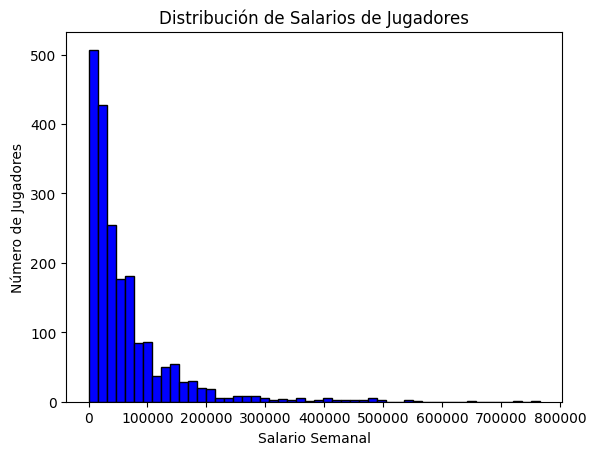

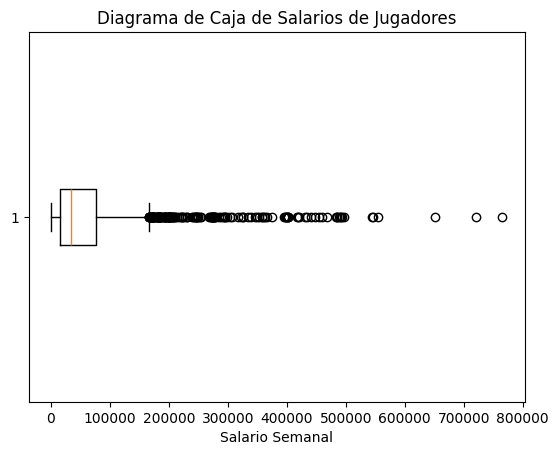

count      2046.000000
mean      62971.574780
std       80808.696296
min         296.000000
25%       15711.000000
50%       34671.000000
75%       75881.250000
max      765144.000000
Name: Salario semanal, dtype: float64


In [10]:
import matplotlib.pyplot as plt

# Crea un histograma de los salarios
salarios = y_train
plt.hist(salarios, bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Jugadores')

# Muestra el gráfico
plt.show()


# Crea un diagrama de caja de los salarios
plt.boxplot(salarios, vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Jugadores')

# Muestra el gráfico
plt.show()


# Distribución de cuartiles
cuartiles = y_train.describe(percentiles=[0.25, 0.5, 0.75])

# Muestra la distribución de cuartiles
print(cuartiles)

**Conclusiones**

* Se cumple ley de la potencia, muchos valores pequeños, pero probabilidad de obtener algunos valores muy grandes, como se puede observar en el gráfico de barras o en el de caja.
* Los 3 percentiles están a distancias similares unos de otros, así como con el valor mínimo, hasta aquí bastante balanceados los datos. Existe no obstante una distancia mucho mayor con respecto al máximo.
* Tanto en el diagrama de caja como en el de barras se puede observar fácilmente que existe una cantidad significativa de jugadores con sueldos mucho mayores a los de la mayoría.

Escalamos logarítmicamente la variable a predecir, para paliar el efecto de la cola alargada y mejorar la distribución de valores de la variable.

https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

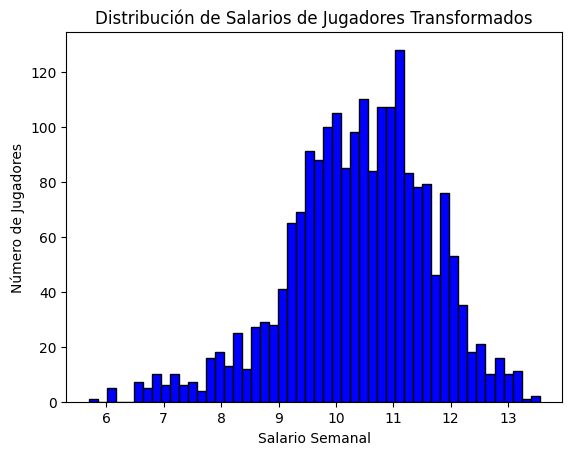

count    2046.000000
mean       10.398297
std         1.246172
min         5.693732
25%         9.662180
50%        10.453688
75%        11.236938
max        13.547821
Name: Salario semanal, dtype: float64


In [11]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Crea un histograma de los salarios
salarios = y_train_log

plt.hist(salarios, bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Jugadores Transformados')

# Muestra el gráfico
plt.show()


# Distribución de cuartiles
cuartiles = y_train_log.describe(percentiles=[0.25, 0.5, 0.75])

# Muestra la distribución de cuartiles
print(cuartiles)

Ahora la distribución se asemeja mucho más a la distribución gaussiana, lo que puede ayudar al entrenamiento de los modelos y todos los percentiles están mucho más equilibrados, lo que ayuda a evitar que valores atípicos o extremos influyan más de lo debido en la construcción del modelo.

Observamos distribución de datos antes de tratar.

C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^

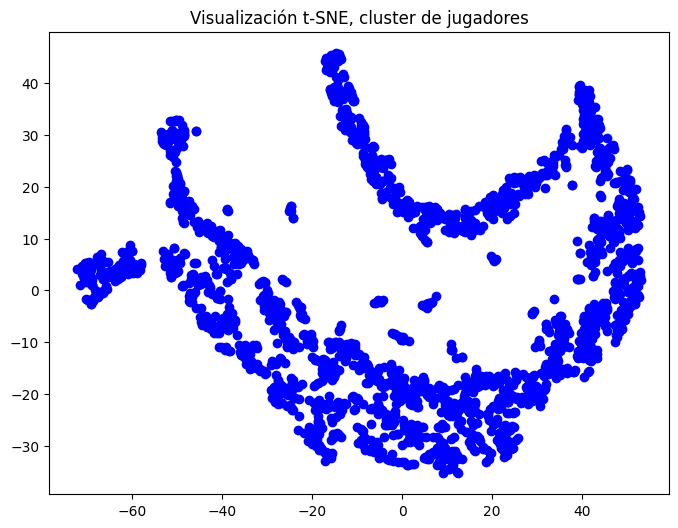

In [12]:
from sklearn.manifold import TSNE

# Creamos un objeto TSNE con el número de componentes deseadas (2D en este caso)
tsne = TSNE(n_components=2, random_state=42)

# Aplicamos t-SNE para reducir la dimensionalidad
X_tsne = tsne.fit_transform(x_train)

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue')

plt.title("Visualización t-SNE, cluster de jugadores")

plt.show()

Podemos ver que se forman dos clusters principales, uno mayoritario y otro con muy pocos datos, probablemente formado por el conjunto de jugadores que menos minutos han jugado, al igual que ya ha ocurrido con porteros y delanteros.

Comprobamos si en efecto el cluster independiente se corresponde a jugadores con salarios bajos.

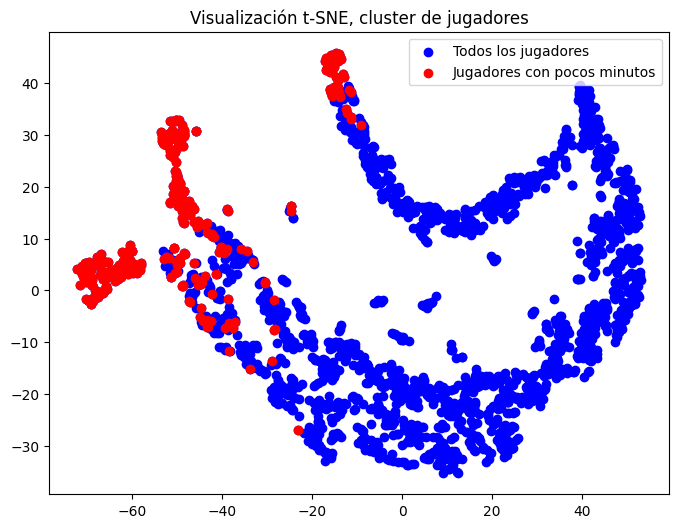

In [14]:
# Nuevas condiciones
c1 = (x_train['Minutos'] < 600)

plt.figure(figsize=(8, 6))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label="Todos los jugadores", c='blue')
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="Jugadores con pocos minutos", c='red')

plt.title("Visualización t-SNE, cluster de jugadores")
plt.legend(loc="upper right")
plt.show()

Vemos que como en los anteriores casos el cluster independiente pertenece a jugadores que juegan menos, la cosa es que algunos de estos jugadores consiguen estadisticas buenas aún jugando pocos minutos y por eso algunos de los jugadores con pocos minutos se encuentran en el cluster principal. Por tanto creo que no sería correcto eliminar a estos jugadores, tal vez solo los que menos juegan, que han jugado tan poco que prácticamente no han podido aumentar nada sus estadísticas.

Pero eso, de momento no eliminaremos a ningún jugador.

A continuación vamos a normalizar los datos. Esto es importante para que estén todos en un mismo rango de valores. La importancia de escalarlos es:

*   Evitar que algunas características dominen sobre otras
*   Mejorar la convergencia en algunos algoritmos como descenso de gradiente

Las variables categóricas ya se mueven en un rango entre 0 y 1 por tanto solo vamos a normalizar las variables continuas. Para ello utilizaremos el método de normalización que consiste en para cada valor x de la columna, restarle el mínimo de la columna y dividir entre el máximo menos el mínimo de la columna:
<center> $z = \frac{{x - x_{min}}}{{x_{max}-x_{min}}}$ </center>

Las variables del test también se normalizan y para ello se utilizan los factores usados en entrenamiento para normalizar.

----

Para estandarizar las variables utilizaremos las siguientes funciones de scikit-learn:

**MinMaxScaler().fit(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se guardan los factores de mínimo y máximo de X en la clase MinMaxScaler

---

**MinMaxScaler().transform(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se transforma X con los factores de mínimo y máximo de la clase MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler # para normalizar

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta el escalador utilizando los datos de train
scaler.fit(x_train[continuas_indices])

# Escalamos train y test con los factores de train
x_train[continuas_indices] = scaler.transform(x_train[continuas_indices])
x_test[continuas_indices] = scaler.transform(x_test[continuas_indices])

Comprobamos que se ha normalizado bien mediante un resumen de las variables continuas.

In [16]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo y mínimo
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

                             Media  Mediana  Desviación Típica  Máximo  Mínimo
Edad                          0.43     0.43               0.18     1.0     0.0
Valor liga ini                0.34     0.29               0.29     1.0     0.0
Partidos                      0.62     0.70               0.27     1.0     0.0
Titularidades                 0.49     0.51               0.28     1.0     0.0
Minutos                       0.48     0.51               0.27     1.0     0.0
Goles                         0.10     0.06               0.12     1.0     0.0
Asistencias                   0.09     0.05               0.11     1.0     0.0
Goles penalti                 0.02     0.00               0.07     1.0     0.0
Penaltis lanzados             0.02     0.00               0.07     1.0     0.0
Amarillas                     0.26     0.24               0.19     1.0     0.0
Rojas                         0.05     0.00               0.12     1.0     0.0
xG        

Comprobar correlación de las variables continuas.

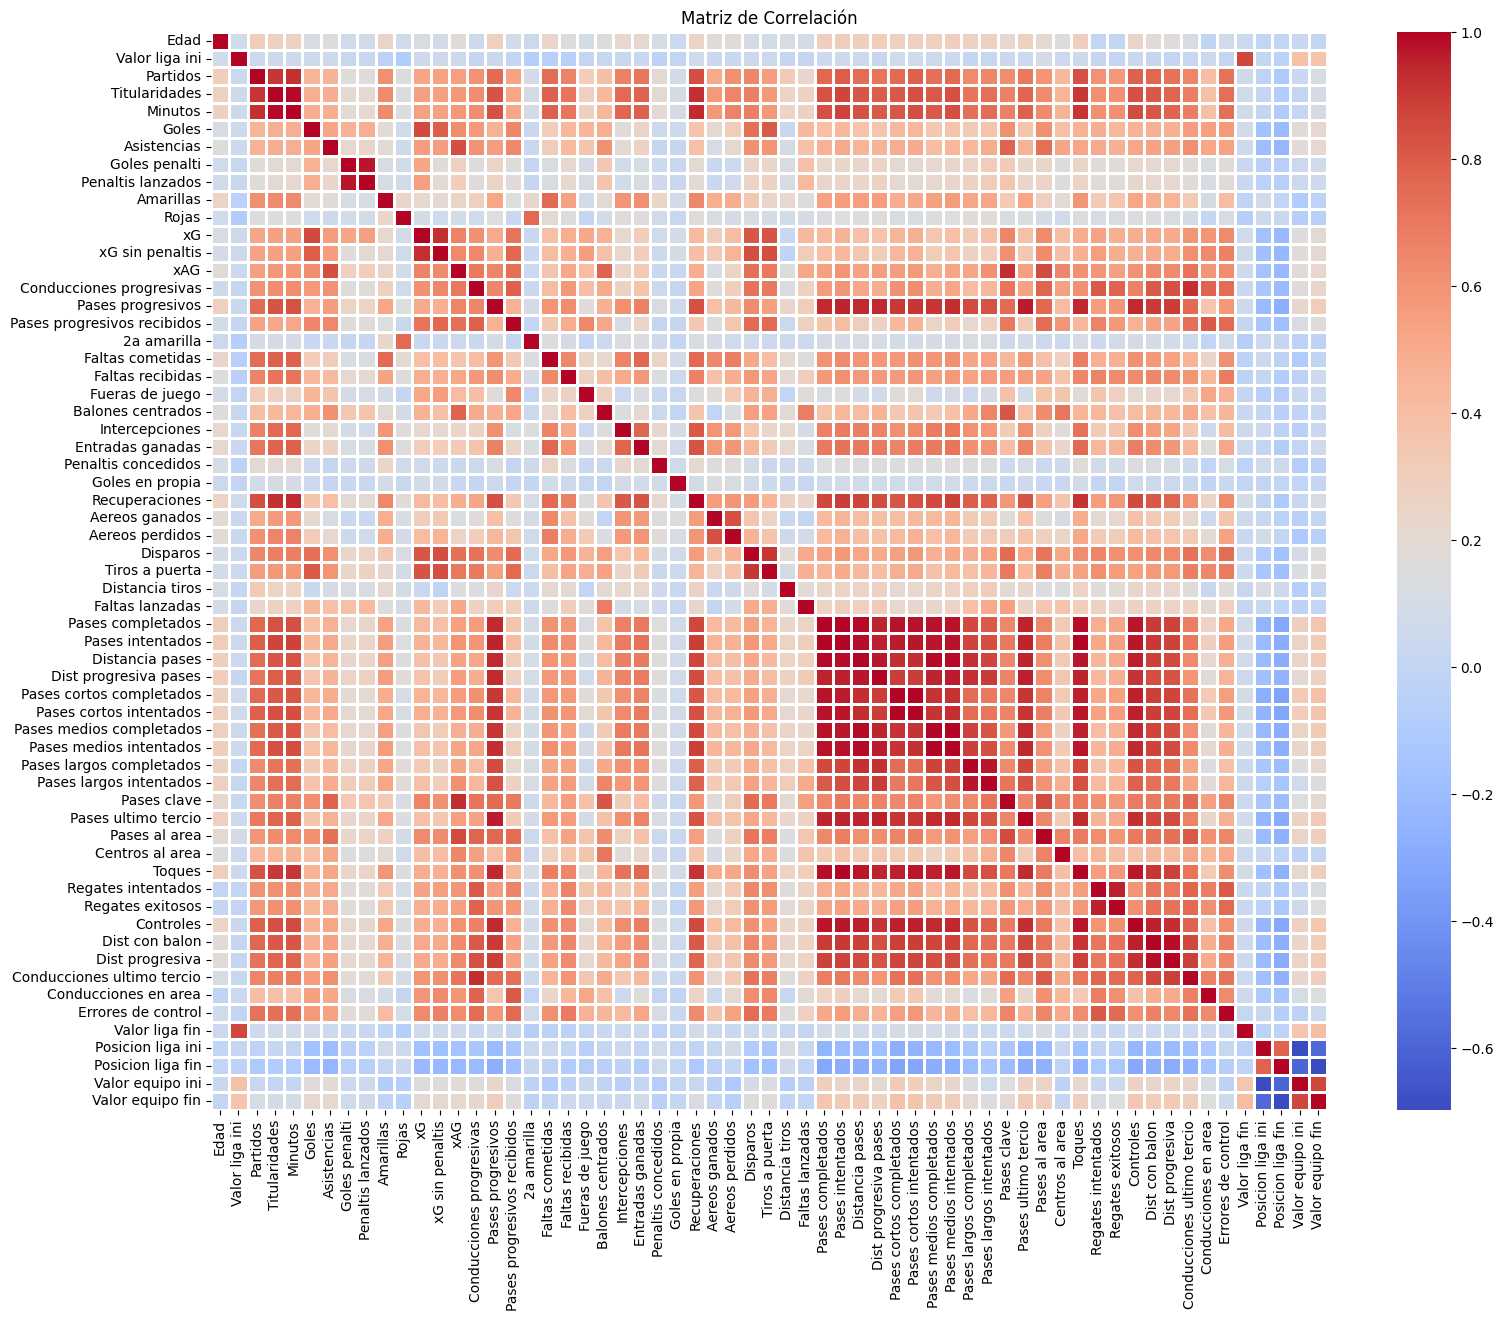

In [17]:
import seaborn as sns

# Calcula la matriz de correlación
matriz_correlacion = x_train[continuas_indices].corr()

# Visualiza la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(18, 14))
sns.heatmap(matriz_correlacion, annot=False, cmap='coolwarm', linewidths=2)
plt.title('Matriz de Correlación')
plt.show()

In [18]:
# Encuentra parejas de características con alta correlación
umbral = 0.99

parejas_relacionadas = set()  # Usamos un conjunto para evitar duplicados
nombres_caracteristicas = matriz_correlacion.columns

for i in range(len(nombres_caracteristicas)):
    for j in range(i + 1, len(nombres_caracteristicas)):
        if abs(matriz_correlacion.iloc[i, j]) > umbral:
            pareja = (nombres_caracteristicas[i], nombres_caracteristicas[j])
            parejas_relacionadas.add(pareja)

# Imprime las parejas de características relacionadas
print("Parejas de características con correlación mayor a {}:".format(umbral))
for pareja in parejas_relacionadas:
    print(pareja)

Parejas de características con correlación mayor a 0.99:
('Pases medios completados', 'Pases medios intentados')
('Pases cortos completados', 'Pases cortos intentados')
('Pases intentados', 'Toques')
('Pases completados', 'Pases intentados')
('Titularidades', 'Minutos')


Selecciono un 99% de correlación ya que considero que eliminando una de estas variables se puede mantener prácticamente la totalidad de la información y conseguimos reducir la dimensionalidad del problema.

Variables correlacionadas:
* ('Titularidades', 'Minutos'): Es entendible la correlación, 1 titularidad suele equivaler a jugar entre 50' y 90'. Veo coherente entonces eliminar 'Titularidades', ya que su información está prácticamente implícita en 'Minutos'.
* ('Pases medios completados', 'Pases medios intentados'): Estas variables hacen referencia a la cantidad de pases de media distancia intentados y completados, la correlación puede deberse a que al final todos los futbolistas tienen una precisión similar para este tipo de pases, fallando así un porcentaje similar de pases y generandose así esta correlación. No obstante creo que mantener ambas variables puede ser bueno, ya que en este caso me gustaría mantener toda la información extra porque al final aunque los porcentajes de precisión sean similares, estos no son idénticos y es interesante que el modelo los tenga en cuenta.
* ('Pases cortos completados', 'Pases cortos intentados'): Misma explicación que las variables anteriores, solo que en este caso son pases cortos.
* ('Pases completados', 'Pases intentados'): Misma explicación que las variables anteriores.
* ('Pases intentados', 'Toques'): Aquí se correlacionan el número de pases intentados por un jugador con el número de toques dado por el jugador, entiendo que por como es el fútbol hoy en día donde los jugadores no suelen retener mucho el balón y se suele controlar y pasar, se puede correlacionar ambas variables, aunque sigo creyendo que ambas proporcionan su propia información, por lo que no eliminaría ninguna de las dos.

In [19]:
# Eliminamos 'Titularidades' por estar correlacionada con 'Minutos'
x_train = x_train.drop('Titularidades', axis=1)
x_test = x_test.drop('Titularidades', axis=1)

continuas_indices.remove('Titularidades')

x_train.head()

,Edad,Valor liga ini,Partidos,Minutos,Goles,Asistencias,Goles penalti,Penaltis lanzados,Amarillas,Rojas,...,Dist con balon,Dist progresiva,Conducciones ultimo tercio,Conducciones en area,Errores de control,Valor liga fin,Posicion liga ini,Posicion liga fin,Valor equipo ini,Valor equipo fin
10706,0.608696,0.778910,0.729730,0.593156,0.722222,0.10,0.090909,0.153846,0.058824,0.00,...,0.503343,0.416293,0.403509,0.20,0.247934,0.778910,0.000000,0.000000,0.862431,0.861926
2139,0.391304,0.309766,0.810811,0.706054,0.111111,0.15,0.000000,0.000000,0.294118,0.00,...,0.317458,0.235981,0.157895,0.06,0.347107,0.309766,0.526316,0.588235,0.164911,0.161848
3567,0.260870,0.150190,0.351351,0.272009,0.000000,0.00,0.000000,0.000000,0.117647,0.00,...,0.121172,0.069246,0.064327,0.00,0.107438,0.150190,1.000000,0.823529,0.037857,0.075380
8813,0.434783,0.355502,0.837838,0.522960,0.222222,0.05,0.000000,0.000000,0.352941,0.00,...,0.164672,0.116904,0.134503,0.06,0.198347,0.355502,0.578947,0.647059,0.048966,0.045478
9590,0.521739,0.179149,0.702703,0.461246,0.222222,0.20,0.000000,0.000000,0.411765,0.25,...,0.240693,0.153564,0.157895,0.14,0.297521,0.179149,0.421053,0.470588,0.154594,0.151493


# 3. Procesado de los datos

Ahora vamos a aplicar el Análisis de Componentes Principales (PCA) sobre nuestras variables continuas para intentar reducir la dimensionalidad de nuestro conjunto de datos mientras se mantiene la información relevante de los datos originales.

He probado a usar FAMD, que es un equivalente de PCA que se puede aplicar tanto a variables categóricas como continuas, pero simplemente reducía a 51 características y no comprendía del todo su funcionamiento por lo que preferí usar PCA.

Cuando whiten se establece en True, PCA realiza una transformación adicional después de calcular los componentes principales. Esta transformación divide cada componente principal por la raíz cuadrada de su autovalor correspondiente. El resultado es que los componentes principales tendrán varianza unitaria, lo que puede ser útil en ciertas aplicaciones.

Por lo tanto, la opción whiten es útil cuando se desea que los componentes principales tengan varianza unitaria y es especialmente útil en aplicaciones donde la escala de las características es importante o donde se desea que los componentes principales tengan la misma escala para facilitar la interpretación.

Número de variables continuas:  60


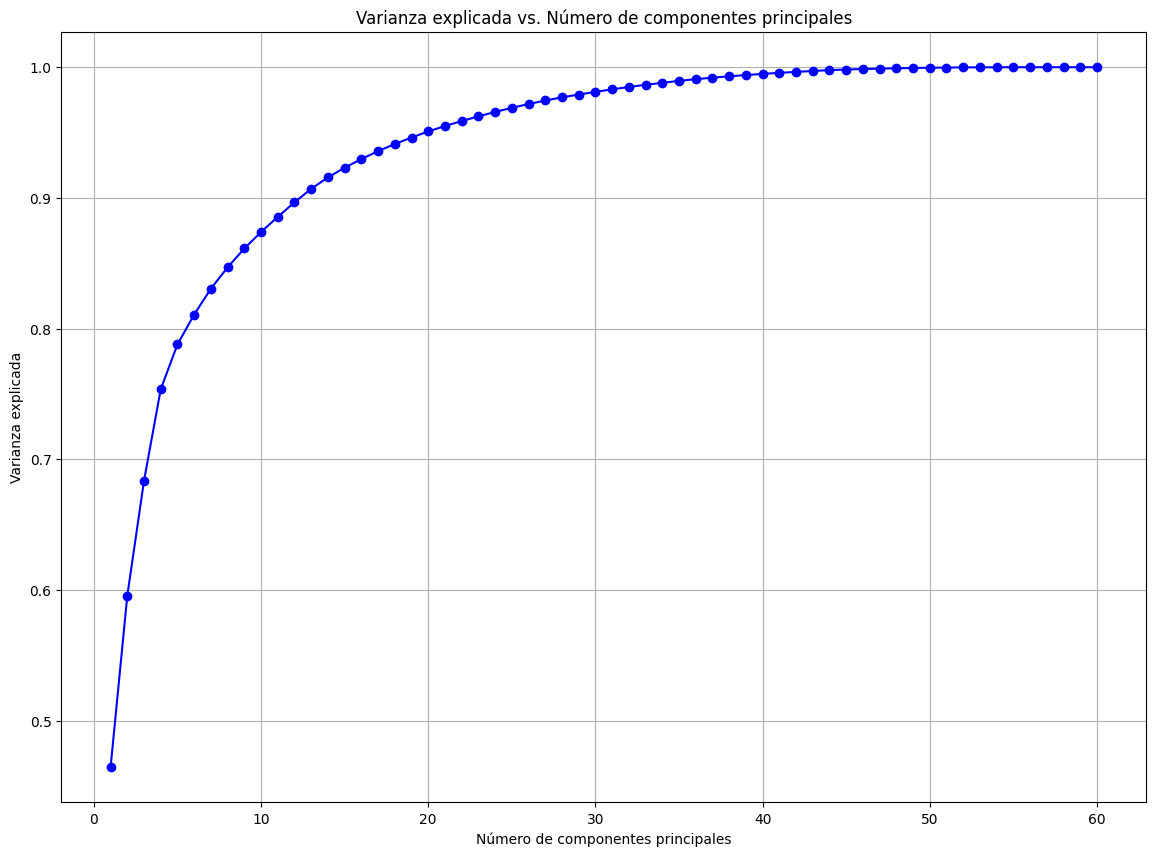

Varianza explicada:
[0.46449369 0.59579327 0.68373743 0.75367712 0.78795833 0.81080715
 0.83057879 0.84694205 0.86132293 0.87395212 0.88551383 0.89665986
 0.90696868 0.91569149 0.92314749 0.92975802 0.93579823 0.94124706
 0.94618203 0.95088554 0.95497127 0.95882901 0.96237829 0.96576051
 0.96896128 0.97181227 0.97454486 0.97691903 0.97910815 0.98114747
 0.98305253 0.98488693 0.9865377  0.98807991 0.98954852 0.99088115
 0.991988   0.99305283 0.99399326 0.99490063 0.99571616 0.99642318
 0.99712297 0.99775748 0.99825338 0.99860164 0.99891038 0.99917479
 0.99941984 0.99958769 0.99974115 0.99984994 0.99993471 0.9999685
 0.99998242 0.99998934 0.99999555 0.9999984  0.99999931 1.        ]


In [20]:
from sklearn.decomposition import PCA # para el PCA
import numpy as np

# Crear una instancia de PCA y ajustar los datos
pca = PCA(n_components=len(continuas_indices), whiten=True)
pca.fit(x_train[continuas_indices])

# Obtén la varianza explicada por cada componente principal
variance_explained = pca.explained_variance_ratio_

# Calcula la varianza explicada acumulativa
cumulative_variance_explained = np.cumsum(variance_explained)

# Crea una lista con el número de componentes principales
num_components = range(1, len(variance_explained) + 1)


print("Número de variables continuas: ", len(continuas_indices))

# Grafica la varianza explicada acumulativa
plt.figure(figsize=(14, 10))
plt.plot(num_components, cumulative_variance_explained, marker='o', linestyle='-', color='b')
plt.grid(True)
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada vs. Número de componentes principales')
plt.show()

print("Varianza explicada:")
print(cumulative_variance_explained)

En la siguiente gráfica podemos ver como va aumentando la varianza explicada dependiendo del número de variables con las que nos quedemos, cuando pasamos de doce a once variables podemos observar que empieza a disminuir drásticamente la varianza, podríamos elegir quedarnos con esas doce variables más reelevantes, el problema es que perdemos bastante varianza, lo ideal es poder suprimir variables pero sin sacrificar varianza, observando entonces la matriz de varianza explicada se puede observar que hasta 36 variables la varianza no baja del 99%, considero que con un 99% de la varianza apenas se pierde información y podemos reducir mucho la dimensión del problema, por lo que así procedo.

In [21]:
# Aplicar PCA como tal para quedarnos con 36 variables continuas
pca = PCA(n_components=36, whiten=True)
print('Características antes de aplicar PCA: ', len(x_train.columns))
pca.fit(x_train[continuas_indices])
x_transformada = pca.transform(x_train[continuas_indices])
x_transformada = pd.DataFrame(data=x_transformada)
x_train_pca = x_train.drop(continuas_indices, axis=1)
x_train_pca = pd.concat([x_train_pca.reset_index(drop=True), x_transformada.reset_index(drop=True)], axis=1)

# Convertimos nombres de variables a string
x_train_pca.columns = x_train_pca.columns.astype(str)

print('Características tras aplicar PCA: ', len(x_train_pca.columns))
x_train_pca.head()

Características antes de aplicar PCA:  60
Características tras aplicar PCA:  36


C:\Users\34667\AppData\Local\Temp\ipykernel_5520\1536757431.py:8: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x_train_pca = pd.concat([x_train_pca.reset_index(drop=True), x_transformada.reset_index(drop=True)], axis=1)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.159369,2.709922,0.214785,1.622555,-0.532205,0.520618,-0.677858,-1.768697,2.894961,0.322268,...,0.811079,-0.886311,1.546648,2.505093,0.892399,-1.285127,-1.232904,-1.515352,-0.179356,0.622575
1,0.475381,-0.681293,0.288401,-0.739492,0.550493,-0.476294,-0.536262,0.407908,-0.112422,1.046813,...,1.445009,-0.767012,-0.221178,-0.773430,0.250385,1.283297,-1.522581,-0.070516,-0.161417,1.643935
2,-1.019382,-1.173116,0.177782,0.111821,-0.917168,-0.910021,0.204073,0.248064,0.140171,2.174525,...,-0.508731,0.398876,-0.167437,0.609197,-0.666128,-1.133891,-0.542063,0.406868,1.219350,0.542136
3,-0.165794,-0.747844,0.504675,0.300914,1.213042,0.285731,-0.757016,0.020209,0.861336,-0.672374,...,-1.578259,0.201837,0.166344,1.586270,0.838475,0.724601,-0.285049,-1.209747,-0.279178,0.344687
4,0.013118,-0.519484,-0.495882,0.963966,0.693375,1.729014,2.176427,-0.893820,-0.349621,-0.682330,...,-0.594101,-0.801366,-0.165810,0.835009,1.009399,2.307481,-0.567217,-0.304821,-0.325691,0.285789


In [22]:
# Podemos ver cuanto aporta cada característica a las nuevas variables creadas por PCA
coeficientes = pca.components_
coeficientes[0]

array([ 0.05675245,  0.0227808 ,  0.26901556,  0.27891461,  0.07582704,
        0.07300587,  0.02008852,  0.02082213,  0.12737024,  0.02128469,
        0.07549905,  0.09523153,  0.07044343,  0.09956109,  0.17927799,
        0.08651766,  0.01940671,  0.15286335,  0.11346441,  0.02525065,
        0.0794469 ,  0.12950752,  0.13812068,  0.02855555,  0.00811889,
        0.2176357 ,  0.05285601,  0.06845969,  0.12579885,  0.10490482,
        0.04020238,  0.03700618,  0.19982456,  0.21035101,  0.19880321,
        0.17863289,  0.14771845,  0.15401697,  0.17556285,  0.18692684,
        0.15067972,  0.14636343,  0.11003352,  0.14313546,  0.10465884,
        0.05083477,  0.22132066,  0.09917799,  0.09633323,  0.20103406,
        0.19896197,  0.162052  ,  0.11090111,  0.05435227,  0.11618284,
        0.03166271, -0.0605355 , -0.09367171,  0.05707919,  0.07929526])

Los coeficientes indican la dirección y la fuerza de la relación entre las variables originales y los componentes principales. Un valor positivo en un coeficiente indica una relación positiva entre la variable original y el componente principal, mientras que un valor negativo indica una relación negativa. La magnitud del coeficiente indica la importancia de la variable original en la creación del componente principal.

In [23]:
# Aplicamos también ahora la misma transformación de PCA a test con los factores de train
x_transformada = pca.transform(x_test[continuas_indices])
x_transformada = pd.DataFrame(data=x_transformada)
x_test_pca = x_test.drop(continuas_indices, axis=1)
x_test_pca = pd.concat([x_test_pca.reset_index(drop=True), x_transformada.reset_index(drop=True)], axis=1)
x_test_pca.columns = x_test_pca.columns.astype(str)

C:\Users\34667\AppData\Local\Temp\ipykernel_5520\685601165.py:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x_test_pca = pd.concat([x_test_pca.reset_index(drop=True), x_transformada.reset_index(drop=True)], axis=1)


Visualización de los datos (Reducción a 2D con sklearn.manifold.TSNE)

In [24]:
from sklearn.manifold import TSNE

# Creamos un objeto TSNE con el número de componentes deseadas (2D en este caso)
tsne = TSNE(n_components=2, random_state=42)

# Aplicamos t-SNE para reducir la dimensionalidad
X_tsne = tsne.fit_transform(x_train_pca)

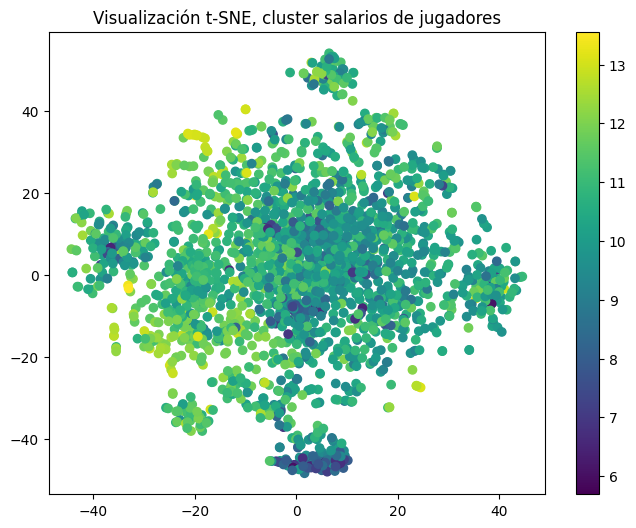

In [25]:
# Visualizamos los datos reducidos en un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_log, cmap='viridis')
plt.title("Visualización t-SNE, cluster salarios de jugadores")
plt.colorbar()
plt.show()

Tras aplicar PCA seguimos teniendo un cluster principal y algunos clusters mucho más pequeños independientes de este cluster principal.

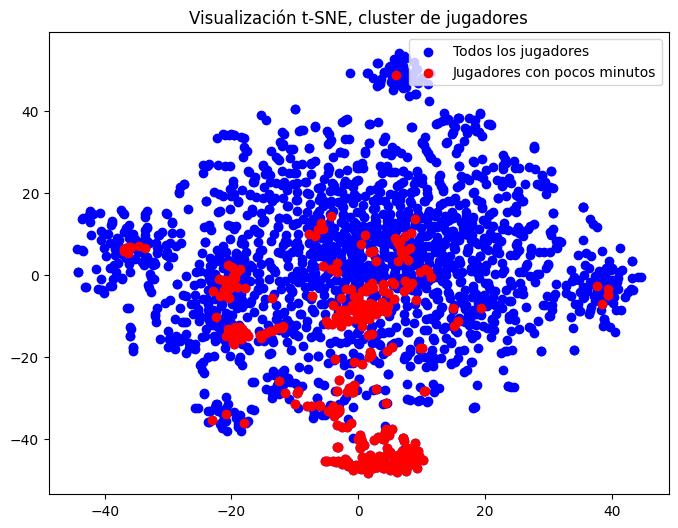

In [26]:
plt.figure(figsize=(8, 6))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label="Todos los jugadores", c='blue')
#c1 corresponde a la condición de haber jugado menos de 600 minutos usada en los anteriores clusters
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="Jugadores con pocos minutos", c='red')

plt.title("Visualización t-SNE, cluster de jugadores")
plt.legend(loc="upper right")
plt.show()

Entiendo por los resultados que el cluster mayoritariamente rojo se corresponde con los jugadores que han tenido tan pocos minutos que sus estadísticas son prácticamente nulas y el resto de puntos rojos esparcidos por todo el cluster principal pertenece a jugadores que a pesar de haber jugado pocos minutos han conseguido hacer buenas estadísticas.

# 4. Discusión de parámetros y selección del mejor modelo

Tras el anterior estudio, llego a la conclusión de que los mejores modelos son Gradient Boosting y Multi Layer Perceptron, por lo que serán los que pruebe aquí, adicionalmente probaré Random Forest que también daba buenos resultados, pero con mucho sobreajuste, quiero ver si para una única posición este modelo obtiene mejores resultados.

Inicializo Kfolds para hacer cross-validation.

In [27]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Definir el objeto KFold con 10 folds
folds = 10
kf = KFold(n_splits=folds)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def crossValidation(model, kFolds, dataset_x, dataset_y, train_stats=False):
  mae = 0
  mse = 0
  r2 = 0
  mae_tr = 0
  mse_tr = 0
  r2_tr = 0

  # Transformar los dataset a numpy
  x = dataset_x.to_numpy()
  y = dataset_y.to_numpy()

  for train_index, val_index in kFolds.split(x):
    # Obtener los conjuntos de entrenamiento y validación para cada fold
    train_x_fold, val_x_fold = x[train_index], x[val_index]
    train_y_fold, val_y_fold = y[train_index], y[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(train_x_fold, train_y_fold)

    # Evaluar el desempeño del modelo en el conjunto de validación
    pred_y = model.predict(val_x_fold)

    # Calcular el MSE medio
    mse += mean_squared_error(val_y_fold, pred_y)

    # Calcular el MAE medio
    mae += mean_absolute_error(val_y_fold, pred_y)

    # Calcular el Coeficiente de determinación
    r2 += r2_score(val_y_fold, pred_y)

    # Calcular errores para train
    if train_stats:
      pred_y = model.predict(train_x_fold)

      mse_tr += mean_squared_error(train_y_fold, pred_y)
      mae_tr += mean_absolute_error(train_y_fold, pred_y)
      r2_tr += r2_score(train_y_fold, pred_y)

  if train_stats:
    return model, mse/folds, mae/folds, r2/folds, mse_tr/folds, mae_tr/folds, r2_tr/folds
  else:
    return model, mse/folds, mae/folds, r2/folds

Como disponemos de pocos datos indico que haya 10 folds, para tener un equilibrio entre seguridad, por haber validado con varios conjuntos, y tiempo de entrenamiento.

In [28]:
def graficaComparacion(valores, titulos, categorias):
  sns.set(rc = {'figure.figsize':(10,8)})

  # Configurar los valores de las barras y su posición en el eje x
  num_variables = len(valores)
  x = np.arange(len(categorias))
  ancho_barras = 0.5 / num_variables

  # Crear la figura y los ejes
  fig, ax = plt.subplots()

  # Ir añadiendo las barras de los distintos modelos
  for i in range(num_variables):
    desplazamiento = i * ancho_barras
    barras = ax.bar(x + desplazamiento, valores[i,:], ancho_barras, label=titulos[i])
    for barra in barras:
        altura = round(barra.get_height(), 3)
        if num_variables < 4:
          ax.annotate(altura, xy=(barra.get_x() + barra.get_width() / 2, altura),
                      xytext=(0, 3),  # Desplazamiento de la etiqueta (opcional)
                      textcoords="offset points",
                      ha='center', va='bottom',
                      fontsize=8)

  # Etiquetas de las categorías en el eje x
  ax.set_xticks(np.arange(len(categorias)) + (num_variables - 1) * ancho_barras / 2)
  ax.set_xticklabels(categorias)

  # Leyenda y título del gráfico
  ax.legend()
  plt.title('Gráfica comparativa de métricas')

  # Mostrar el gráfico
  plt.show()

In [29]:
from tabulate import tabulate

def tablaComparacion(valores, categorias, titulos):
  # Imprimir la tabla
  metricas = []
  titulos2 = titulos.copy()
  titulos2.insert(0, 'Métricas de error')
  for i in range(len(valores[0])):
    fila = []
    fila.append(categorias[i])
    for j in range(len(valores)):
      fila.append(valores[j][i])
    metricas.append(fila)

  print(tabulate(metricas, headers=titulos2, tablefmt="fancy_grid"))

### Random Forest

**n_estimators**

Un valor más alto generalmente reduce el riesgo de sobreajuste, ya que promedia las predicciones de múltiples árboles, reduciendo así el ruido y la variabilidad. Sin embargo, un valor excesivamente alto podría aumentar la complejidad del modelo.

╒═════════════════════╤═════════════════════╤═════════════════════╤══════════════════════╕
│ Métricas de error   │   n_estimators = 20 │   n_estimators = 50 │   n_estimators = 100 │
╞═════════════════════╪═════════════════════╪═════════════════════╪══════════════════════╡
│ MSE                 │           0.620545  │           0.595409  │            0.586302  │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┤
│ MAE                 │           0.598584  │           0.586597  │            0.582235  │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┤
│ R^2                 │           0.595884  │           0.612057  │            0.618123  │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┤
│ MSE-TR              │           0.0998607 │           0.0864632 │            0.0826978 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┤

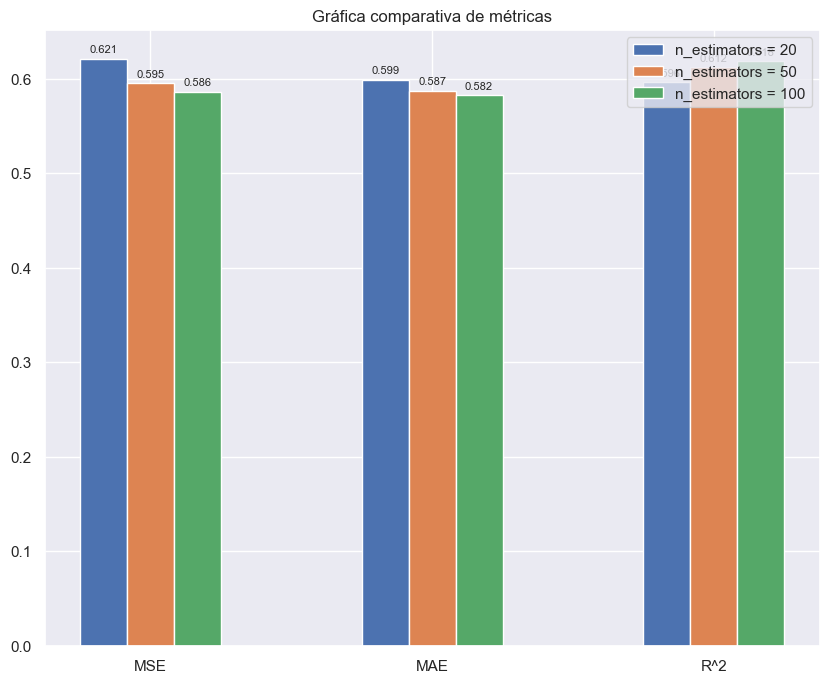

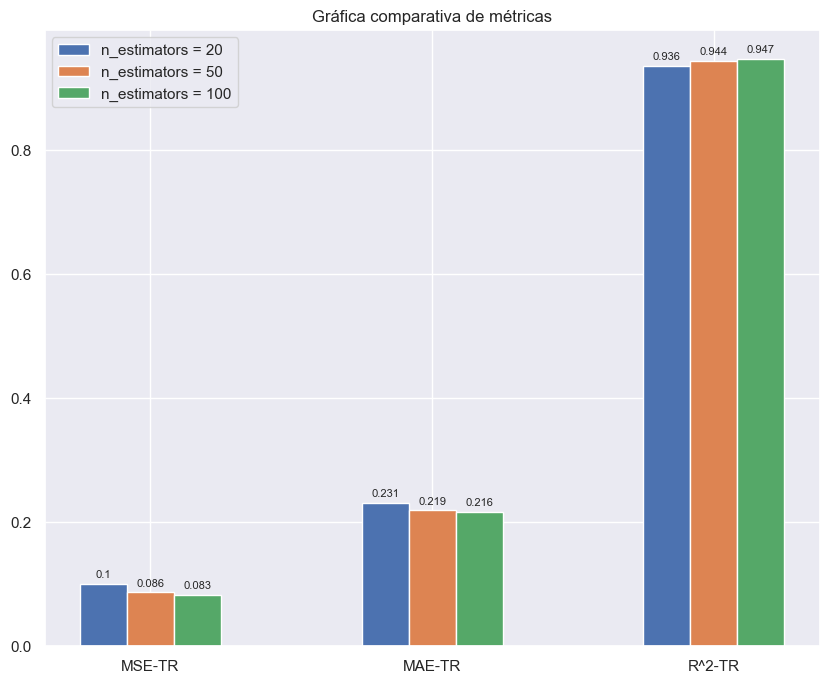

In [70]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
tree_1 = RandomForestRegressor(n_estimators = 20, random_state=34, n_jobs=-1)
tree_2 = RandomForestRegressor(n_estimators = 50, random_state=34, n_jobs=-1)
tree_3 = RandomForestRegressor(n_estimators = 100, random_state=34, n_jobs=-1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(tree_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(tree_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(tree_3, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['n_estimators = 20', 'n_estimators = 50', 'n_estimators = 100']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

En cuanto a los resultados son igual de malos que en el estudio principal, tenemos un sobreajuste a los datos de entrenamiento enorme, al igual que entonces me quedo con 50 árboles.

**max_features**

Reducir el número de características a usar en los splits puede ayudar, ya que aumenta la estocasticidad del modelo.

╒═════════════════════╤════════════════════╤════════════════════╤═════════════════════╤═════════════════════╕
│ Métricas de error   │   max_features=0.5 │   max_features=1.0 │   max_features=sqrt │   max_features=log2 │
╞═════════════════════╪════════════════════╪════════════════════╪═════════════════════╪═════════════════════╡
│ MSE                 │           0.577429 │          0.595409  │            0.636596 │           0.647605  │
├─────────────────────┼────────────────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ MAE                 │           0.576624 │          0.586597  │            0.614681 │           0.620127  │
├─────────────────────┼────────────────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ R^2                 │           0.62391  │          0.612057  │            0.586127 │           0.578714  │
├─────────────────────┼────────────────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ MSE-TR  

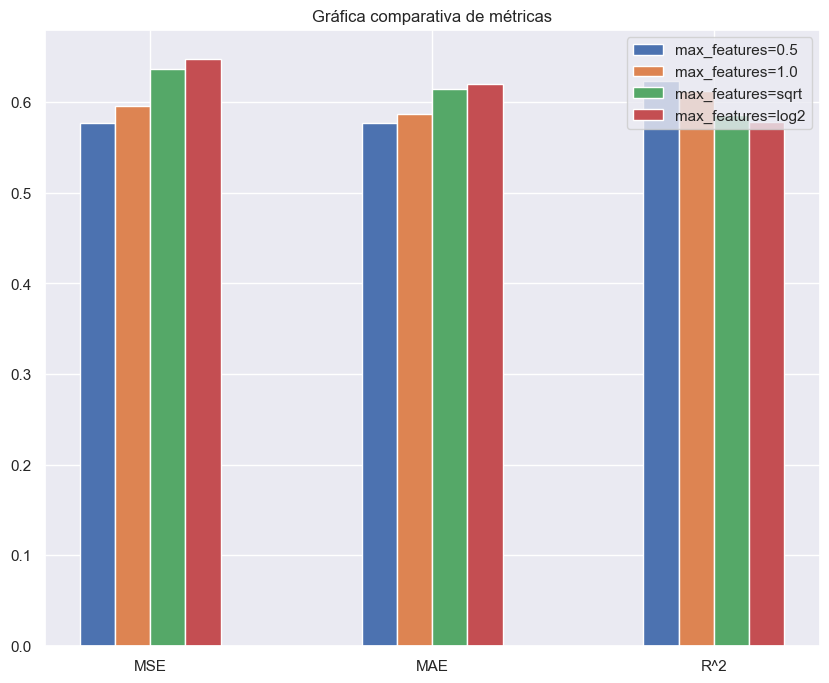

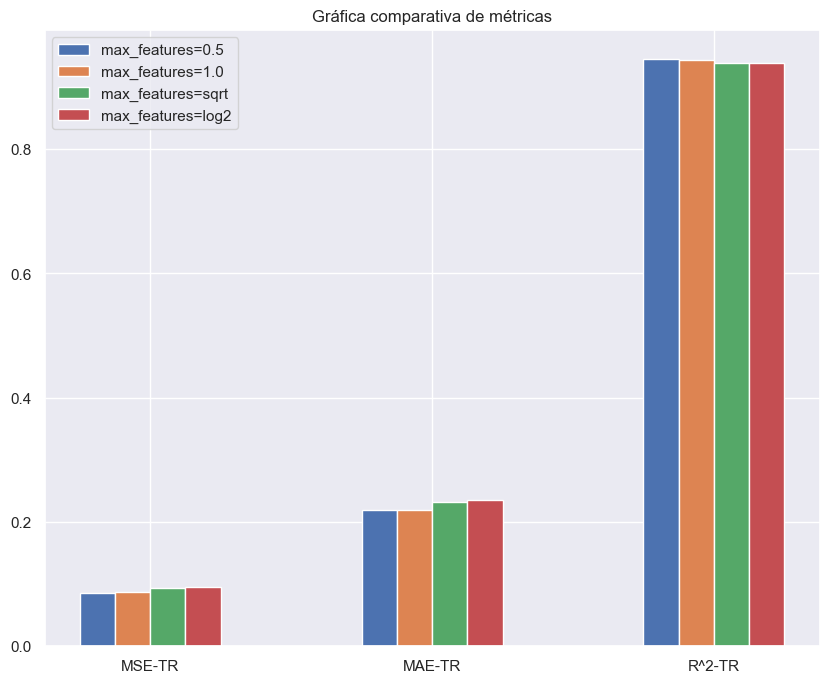

In [71]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
tree_1 = RandomForestRegressor(n_estimators = 50, max_features=0.5, random_state=34, n_jobs=-1)
tree_2 = RandomForestRegressor(n_estimators = 50, max_features=1.0, random_state=34, n_jobs=-1)
tree_3 = RandomForestRegressor(n_estimators = 50, max_features='sqrt', random_state=34, n_jobs=-1)
tree_4 = RandomForestRegressor(n_estimators = 50, max_features='log2', random_state=34, n_jobs=-1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(tree_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(tree_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(tree_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(tree_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['max_features=0.5', 'max_features=1.0', 'max_features=sqrt', 'max_features=log2']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

No conseguimos generalizar mejor, aunque al quedarnos con la mitad de características los resultados son algo mejores, por lo que selecciono esa opción.

In [72]:
# Obtener los árboles individuales
arboles = tree_1.estimators_
profundidad = 0
media = 0

# Imprimir la profundidad de cada árbol
for i, arbol in enumerate(arboles):
    media += arbol.tree_.max_depth
    if profundidad < arbol.tree_.max_depth: profundidad = arbol.tree_.max_depth

print(f'Profundidad media: {media/50}')
print(f'Profundidad máxima: {profundidad}')

Profundidad media: 24.12
Profundidad máxima: 30


**max_depht**

Limitar la profundidad de los árboles puede reducir el riesgo de sobreajuste. Si se establece max_depth en un valor bajo, los árboles serán más simples y menos propensos al sobreajuste. Recordar que antes la profundidad máxima ha sido 30 y la media 24,12.

╒═════════════════════╤══════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤═══════════════╕
│ Métricas de error   │   max_depth=None │   max_depth=25 │   max_depth=20 │   max_depth=15 │   max_depth=10 │   max_depth=5 │
╞═════════════════════╪══════════════════╪════════════════╪════════════════╪════════════════╪════════════════╪═══════════════╡
│ MSE                 │         0.577429 │      0.578175  │      0.576001  │      0.57607   │       0.584353 │      0.656015 │
├─────────────────────┼──────────────────┼────────────────┼────────────────┼────────────────┼────────────────┼───────────────┤
│ MAE                 │         0.576624 │      0.576681  │      0.576839  │      0.579846  │       0.580232 │      0.618404 │
├─────────────────────┼──────────────────┼────────────────┼────────────────┼────────────────┼────────────────┼───────────────┤
│ R^2                 │         0.62391  │      0.623259  │      0.624957  │      0.625045  │       0.61992  │ 

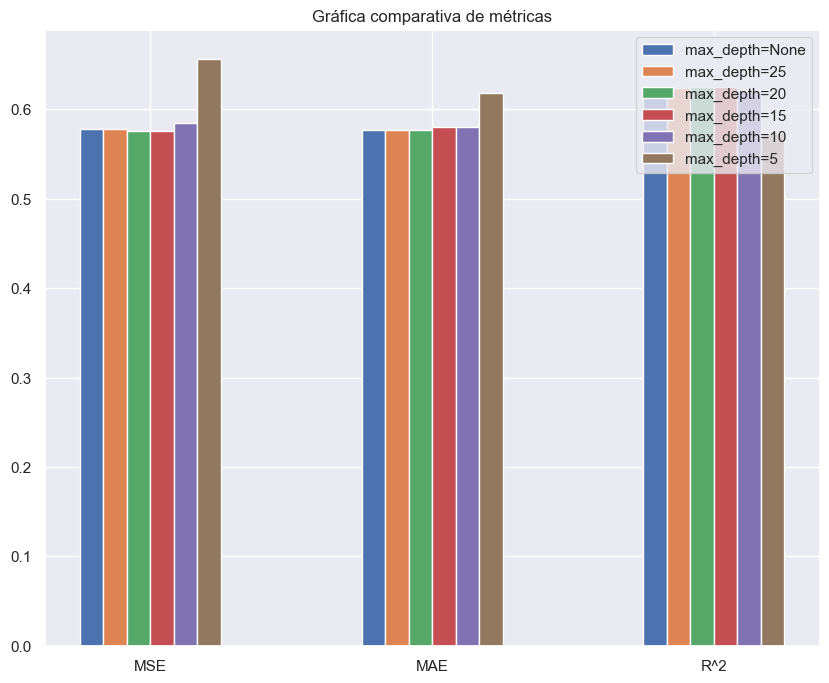

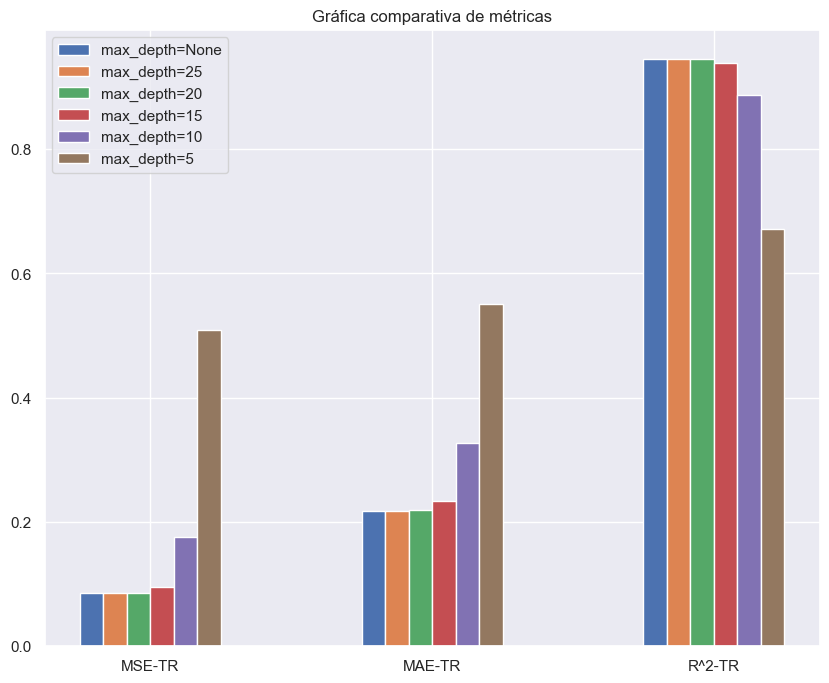

In [73]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
tree_1 = RandomForestRegressor(n_estimators = 50, max_features=0.5, max_depth=None, random_state=34, n_jobs=-1)
tree_2 = RandomForestRegressor(n_estimators = 50, max_features=0.5, max_depth=25, random_state=34, n_jobs=-1)
tree_3 = RandomForestRegressor(n_estimators = 50, max_features=0.5, max_depth=20, random_state=34, n_jobs=-1)
tree_4 = RandomForestRegressor(n_estimators = 50, max_features=0.5, max_depth=15, random_state=34, n_jobs=-1)
tree_5 = RandomForestRegressor(n_estimators = 50, max_features=0.5, max_depth=10, random_state=34, n_jobs=-1)
tree_6 = RandomForestRegressor(n_estimators = 50, max_features=0.5, max_depth=5, random_state=34, n_jobs=-1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(tree_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(tree_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(tree_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(tree_4, kf, x_train_pca, y_train_log, True)
result5 = crossValidation(tree_5, kf, x_train_pca, y_train_log, True)
result6 = crossValidation(tree_6, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:], result5[1:], result6[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['max_depth=None', 'max_depth=25', 'max_depth=20', 'max_depth=15', 'max_depth=10', 'max_depth=5']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Los resultados al final son iguales que usando todas las posiciones, sigue habiendo mucho sobreajuste, muy probablemente porque RF es un modelo muy complejo para mi reducido conjunto de datos.

### Gradient Boosting

**n_estimators**

Por lo general a mayor número mejores resultados, aunque hay que encontrar el equilibrio entre mejora y tiempo de cómputo invertido.

╒═════════════════════╤═════════════════════╤═════════════════════╤══════════════════════╤══════════════════════╕
│ Métricas de error   │   n_estimators = 20 │   n_estimators = 50 │   n_estimators = 100 │   n_estimators = 200 │
╞═════════════════════╪═════════════════════╪═════════════════════╪══════════════════════╪══════════════════════╡
│ MSE                 │            0.697511 │            0.586682 │             0.564653 │             0.560318 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┤
│ MAE                 │            0.636986 │            0.578101 │             0.568219 │             0.569732 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┤
│ R^2                 │            0.547399 │            0.617491 │             0.631495 │             0.634516 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────

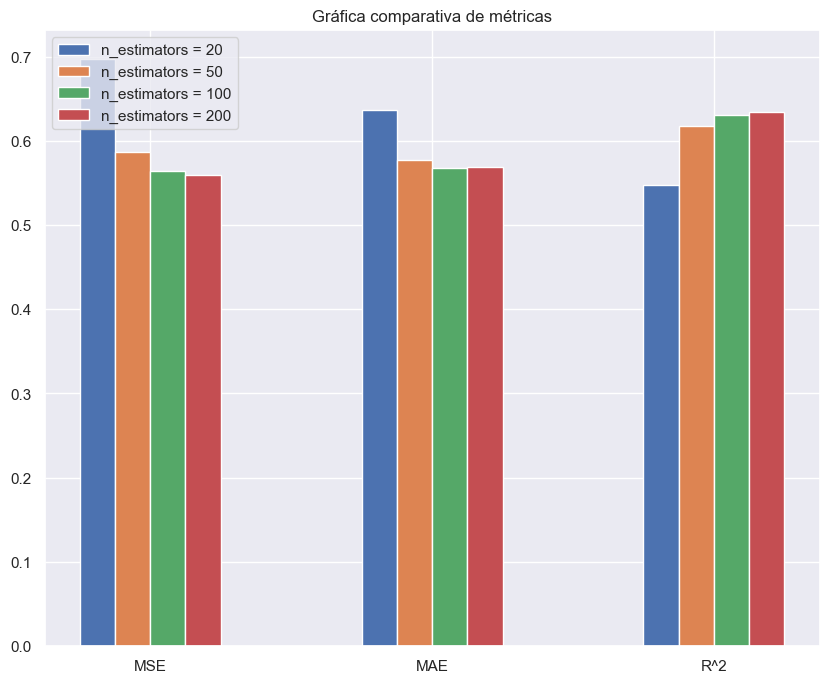

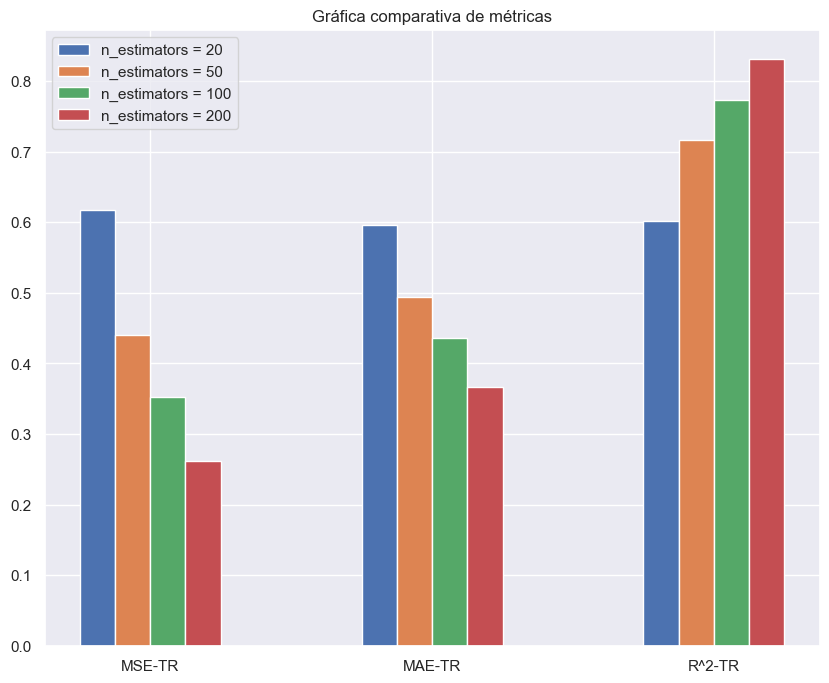

In [74]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 20, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 200, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['n_estimators = 20', 'n_estimators = 50', 'n_estimators = 100', 'n_estimators = 200']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

De momento 50 árboles está bien, el tiempo de cómputo es competente y los resultados buenos, no aumentamos más debido a que ya no hay tanta mejora en validación, si conseguimos mejorar la generalización del modelo más adelante puede que aumente el número de árboles.

**learning_rate**

Un valor más bajo de tasa de aprendizaje reduce el impacto de cada árbol, lo que puede ayudar a prevenir el sobreajuste y a mejorar la generalización.

Probamos un conjunto de valores alrededor de 0.1 que es el valor predeterminado.

╒═════════════════════╤════════════════════════╤════════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╕
│ Métricas de error   │   learning_rate = 0.04 │   learning_rate = 0.08 │   learning_rate = 0.1 │   learning_rate = 0.4 │   learning_rate = 0.8 │
╞═════════════════════╪════════════════════════╪════════════════════════╪═══════════════════════╪═══════════════════════╪═══════════════════════╡
│ MSE                 │               0.701109 │               0.600349 │              0.586682 │              0.622902 │              0.815166 │
├─────────────────────┼────────────────────────┼────────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┤
│ MAE                 │               0.639486 │               0.586257 │              0.578101 │              0.605827 │              0.697001 │
├─────────────────────┼────────────────────────┼────────────────────────┼───────────────────────┼───────────────────────┼───

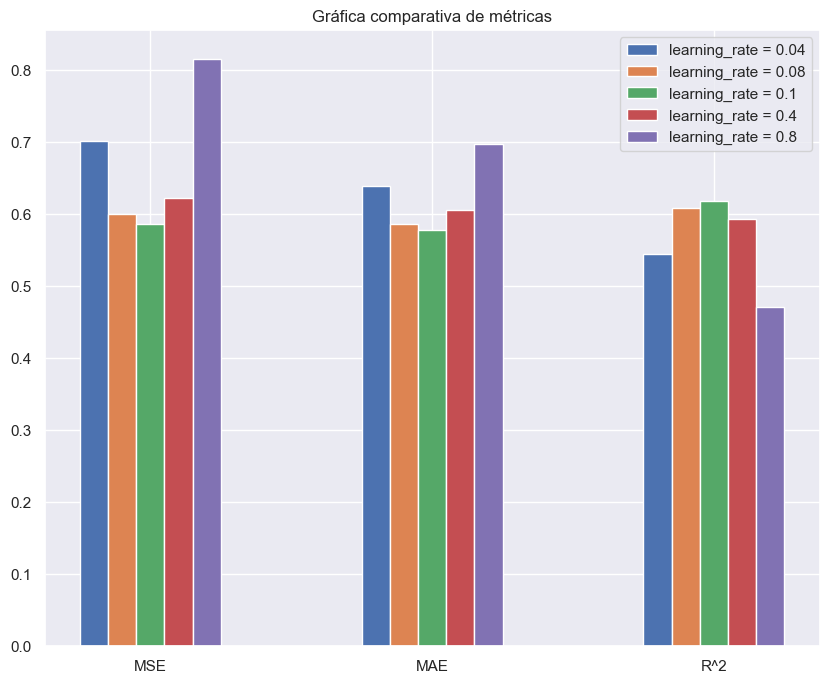

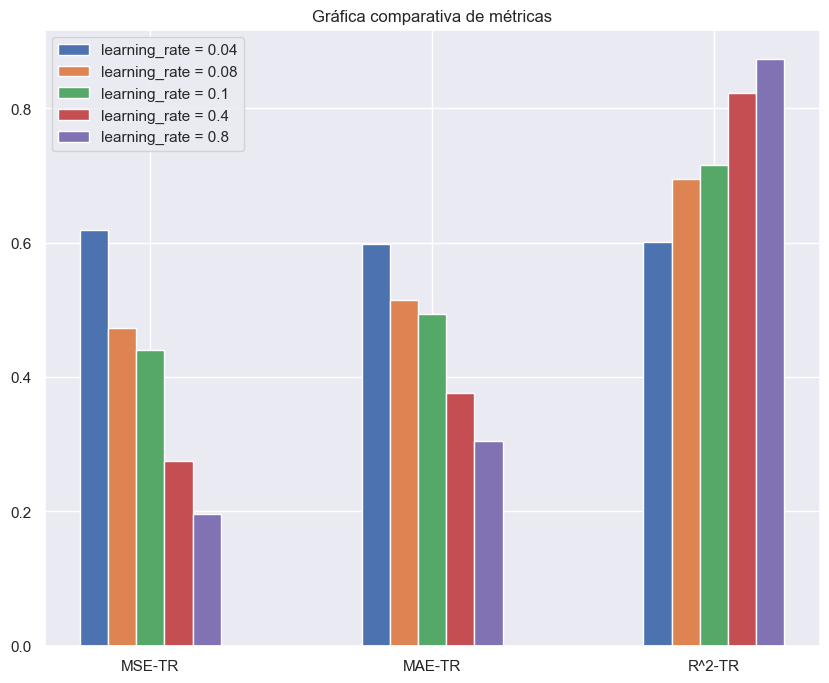

In [75]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.04, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.08, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.4, random_state=34)
model_5 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.8, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)
result5 = crossValidation(model_5, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:], result5[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['learning_rate = 0.04', 'learning_rate = 0.08', 'learning_rate = 0.1', 'learning_rate = 0.4', 'learning_rate = 0.8']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Un learning_rate de 0.1 es el que mejores resultados ofrece, por lo que mantengo dicho valor.

**subsample**

Un valor menor de subsample significa una reducción de la varianza y aumento del sesgo en el proceso de entrenamiento, ya que cada árbol se entrena en un subconjunto aleatorio de las muestras. Esto puede ayudar a reducir el riesgo de sobreajuste.

Probaré con distintos porcentajes de subsample.

╒═════════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│ Métricas de error   │   subsample=1.0 │   subsample=0.8 │   subsample=0.6 │   subsample=0.4 │
╞═════════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╡
│ MSE                 │        0.586682 │        0.582556 │        0.585706 │        0.584788 │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ MAE                 │        0.578101 │        0.57634  │        0.576172 │        0.578896 │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ R^2                 │        0.617491 │        0.620642 │        0.619028 │        0.619578 │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ MSE-TR              │        0.440398 │        0.440682 │        0.443047 │        0.450711 │
├─────────────────────┼─────────────────

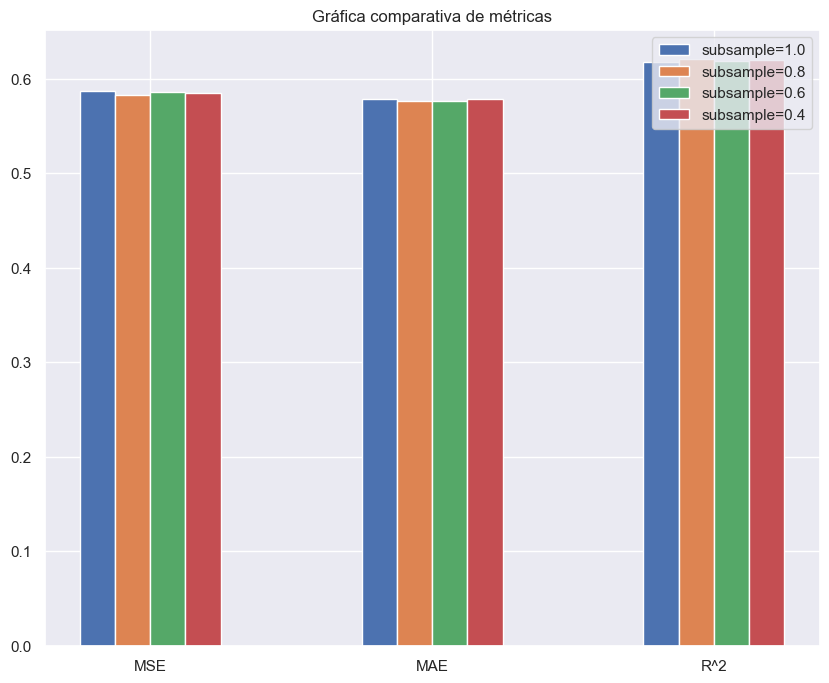

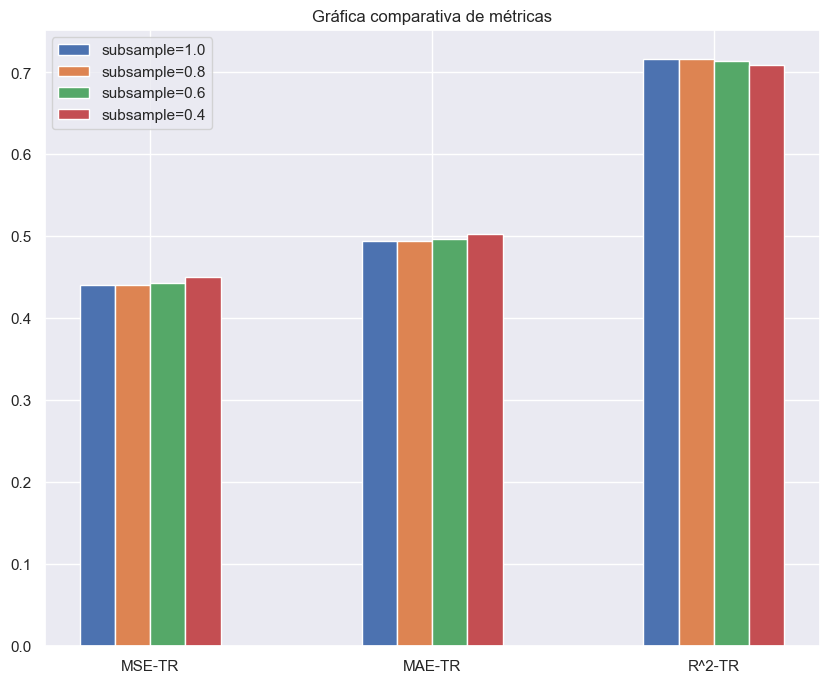

In [76]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, subsample=1.0, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, subsample=0.8, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, subsample=0.6, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, subsample=0.4, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['subsample=1.0', 'subsample=0.8', 'subsample=0.6', 'subsample=0.4']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Nos quedamos con subsamples del 80%, ya que sus resultados son muy similares a quedarnos con todo el sample.

**max_depth**

A mayor profundidad creamos árboles más complejos, pero puede existir sobreajuste si no se controla. Probaré varios valores teniendo en cuenta que hasta ahora el valor por defecto ha sido 3.

╒═════════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│ Métricas de error   │   max_depth=2 │   max_depth=3 │   max_depth=4 │   max_depth=6 │
╞═════════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ MSE                 │      0.62351  │      0.582556 │      0.569776 │      0.577963 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MAE                 │      0.596103 │      0.57634  │      0.571009 │      0.577174 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ R^2                 │      0.59501  │      0.620642 │      0.628263 │      0.622861 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MSE-TR              │      0.547599 │      0.440682 │      0.330718 │      0.132421 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MAE-TR              │      0.5

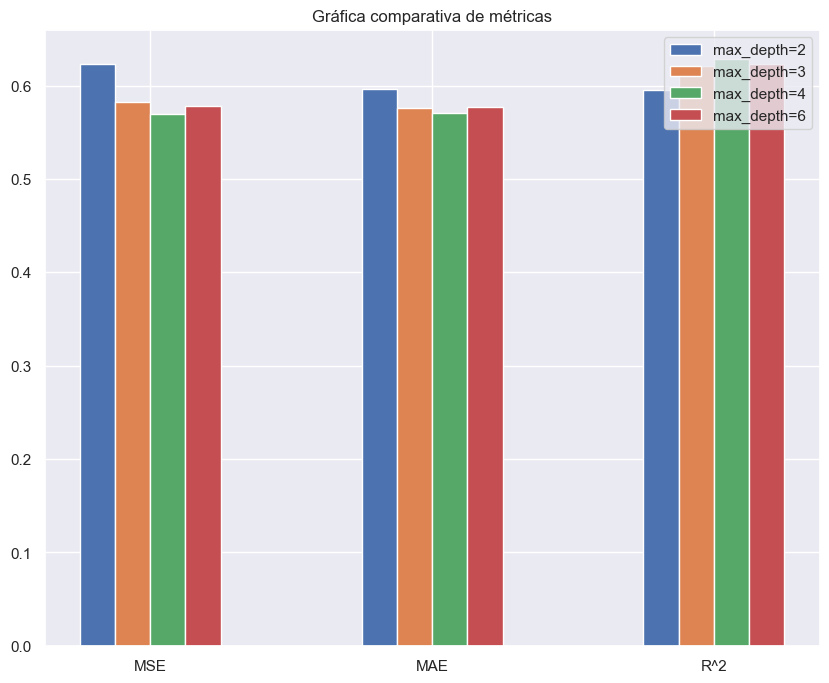

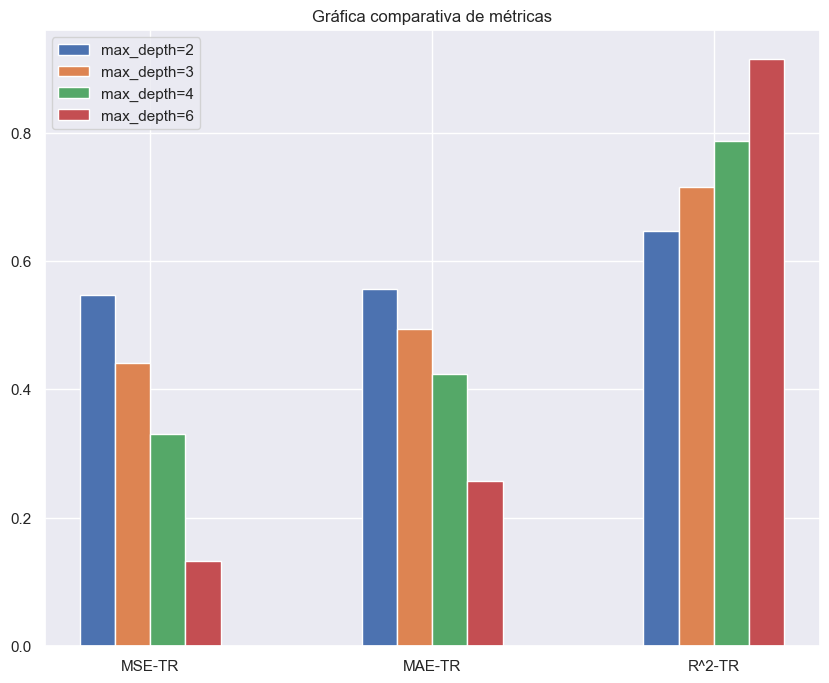

In [77]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, subsample=0.8, max_depth=2, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, subsample=0.8, max_depth=3, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, subsample=0.8, max_depth=4, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, subsample=0.8, max_depth=6, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['max_depth=2', 'max_depth=3', 'max_depth=4', 'max_depth=6']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Una profundidad de 3 es la que mejores resultados da, entiendo que no podemos reducir más el sobreajuste mediante tuneo de parámetros, si reducimos la complejidad el modelo no generalizará mejor, sino que simplemente no podrá adaptarse a la complejidad de la relación de los datos del problema.

**max_features**

Al reducir el máximo de características hacemos que se reduzca la variabilidad y aumente el sesgo, aunque con otros parámetros que ya hemos modificado esto no ha ayudado probaré varios valores para ver si sirve de algo.

╒═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ Métricas de error   │   max_features=None │   max_features=sqrt │   max_features=log2 │
╞═════════════════════╪═════════════════════╪═════════════════════╪═════════════════════╡
│ MSE                 │            0.582556 │            0.631178 │            0.628974 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MAE                 │            0.57634  │            0.603892 │            0.603904 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ R^2                 │            0.620642 │            0.590309 │            0.591295 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MSE-TR              │            0.440682 │            0.503798 │            0.499106 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MAE-TR  

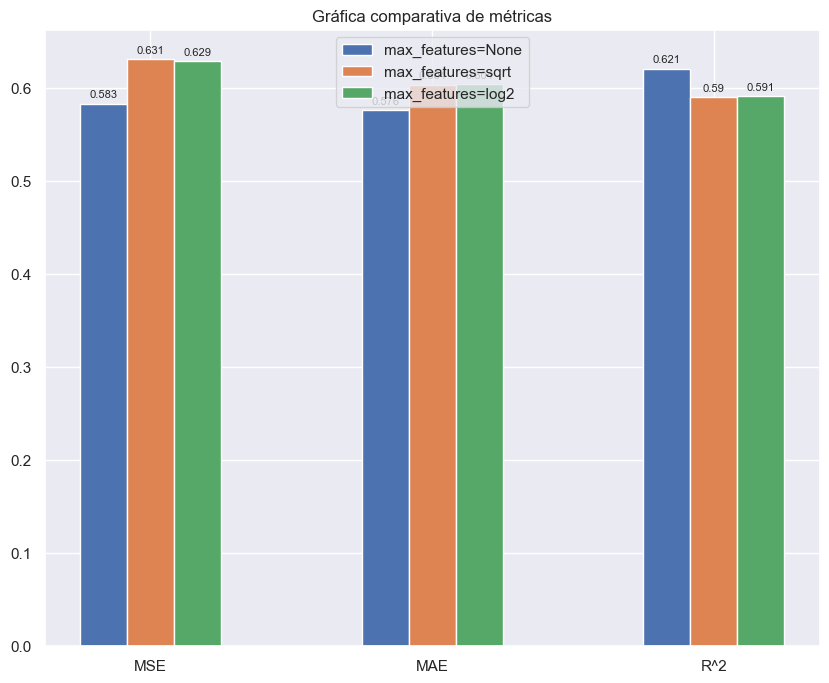

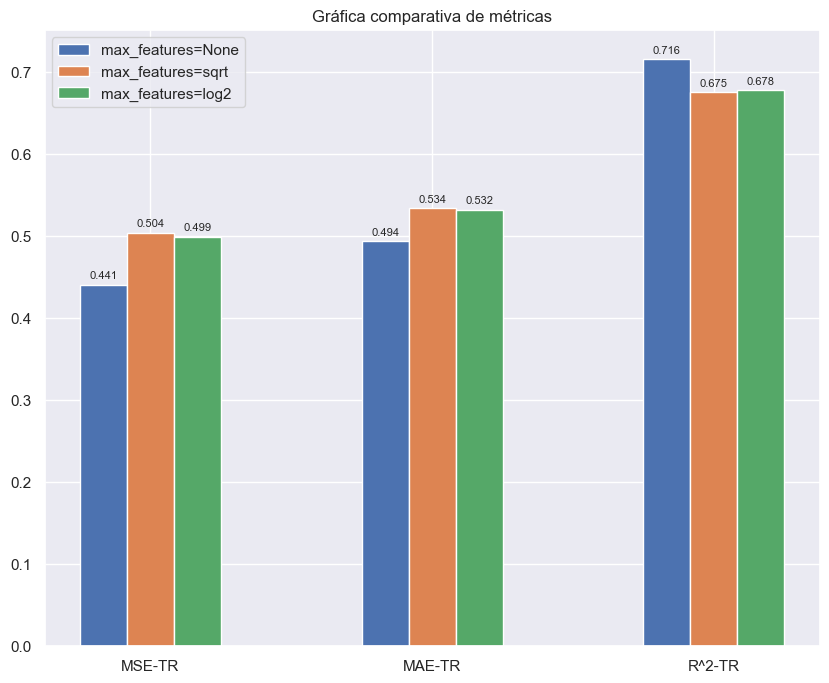

In [78]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, subsample=0.8, max_depth=3, max_features=None, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, subsample=0.8, max_depth=3, max_features='sqrt', random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 50, learning_rate=0.1, subsample=0.8, max_depth=3, max_features='log2', random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['max_features=None', 'max_features=sqrt', 'max_features=log2']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

De nuevo el intentar reducir la complejidad no sirve de nada, apesar de que reduciendo características se generaliza mejor, esto no es por una mejora en los resultados de validación, sino por una peora en los de train, dejo pues el parámetro que había por defecto.

Concluyendo, usando solo jugadores de una posición no obtenemos ninguna mejora con GB, de hecho el disponer de menos datos probablemente sea la causa de que esta vez los resultados sean algo peores (1 puntos por debajo en $R^2$).

### Multi Layer Perceptron

In [79]:
from skopt import BayesSearchCV

# Definimos el espacio de búsqueda de hiperparámetros
search_space = {
    'hidden_layer_sizes': (5, 100),  # Número de neuronas en la capa oculta
    'alpha': (0.001, 10),  # Rango de valores para el parámetro de regularización alpha
    'activation': ['logistic', 'tanh', 'relu'],  # Función de activación
    'solver': ['lbfgs', 'adam'],  # Algoritmo de optimización
    'learning_rate_init': (0.001, 1), # Learning rate inicial
    'batch_size': (1, 32)
}

# Creamos un estimador (en este caso un MLP)
estimator = MLPRegressor(max_iter=750, random_state=0, early_stopping=True)

# Inicializamos BayesSearchCV con el estimador, el espacio de búsqueda y la estrategia de validación cruzada
opt = BayesSearchCV(estimator, search_space, n_iter=100, scoring="r2", cv=10, n_jobs=-1, random_state=42, refit=False, return_train_score=True, verbose=1)

# Realizamos la búsqueda de hiperparámetros
opt.fit(x_train_pca, y_train_log)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

BayesSearchCV(cv=10,
              estimator=MLPRegressor(early_stopping=True, max_iter=750,
                                     random_state=0),
              n_iter=100, n_jobs=-1, random_state=42, refit=False,
              return_train_score=True, scoring='r2',
              search_spaces={'activation': ['logistic', 'tanh', 'relu'],
                             'alpha': (0.001, 10), 'batch_size': (1, 32),
                             'hidden_layer_sizes': (5, 100),
                             'learning_rate_init': (0.001, 1),
                             'solver': ['lbfgs', 'adam']},
              verbose=1)

In [80]:
# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", opt.best_params_)
print("Resultado (R^2):", opt.best_score_)

Mejores hiperparámetros: OrderedDict([('activation', 'logistic'), ('alpha', 9.485034506695417), ('batch_size', 1), ('hidden_layer_sizes', 29), ('learning_rate_init', 0.001), ('solver', 'lbfgs')])
Resultado (R^2): 0.640958107753581


Los resultados son prácticamente idénticos a cuando se incluyen todas las posiciones en el modelo, no obstante algún parámetro ha sido establecido a su valor máximo/mínimo posible, por lo que creo que puede existir aún un margen de mejora, obtenidos estos resultados, veo también conveniente probar más parámetros en el anterior estudio, por ejemplo usando un valor bajo de batch_size.

**learning_rate**

╒═════════════════════╤════════════════════════════╤═════════════════════════════╤══════════════════════════════╕
│ Métricas de error   │   learning_rate_init=0.001 │   learning_rate_init=0.0001 │   learning_rate_init=0.00001 │
╞═════════════════════╪════════════════════════════╪═════════════════════════════╪══════════════════════════════╡
│ MSE                 │                   0.497622 │                    0.497622 │                     0.497622 │
├─────────────────────┼────────────────────────────┼─────────────────────────────┼──────────────────────────────┤
│ MAE                 │                   0.53982  │                    0.53982  │                     0.53982  │
├─────────────────────┼────────────────────────────┼─────────────────────────────┼──────────────────────────────┤
│ R^2                 │                   0.675562 │                    0.675562 │                     0.675562 │
├─────────────────────┼────────────────────────────┼─────────────────────────────┼──────

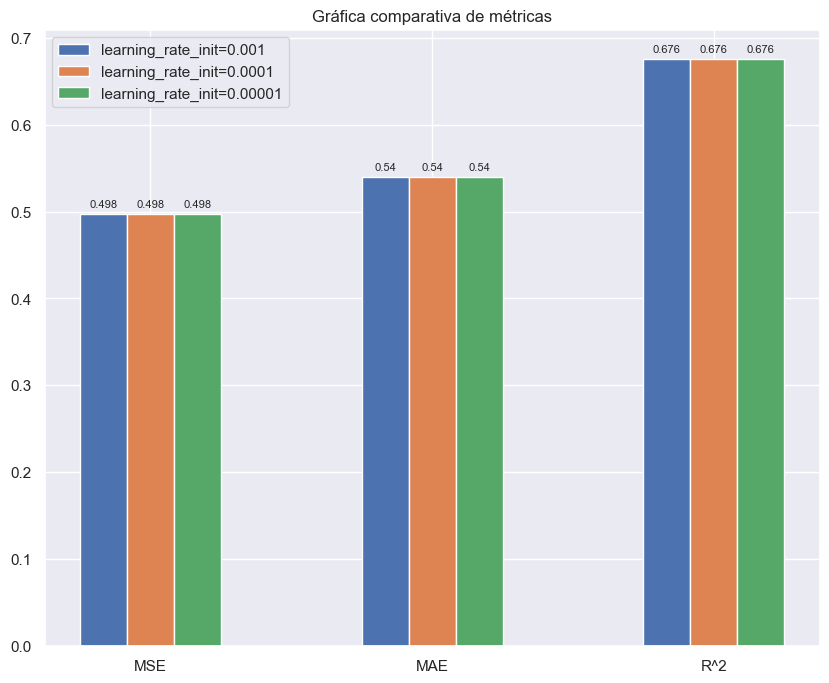

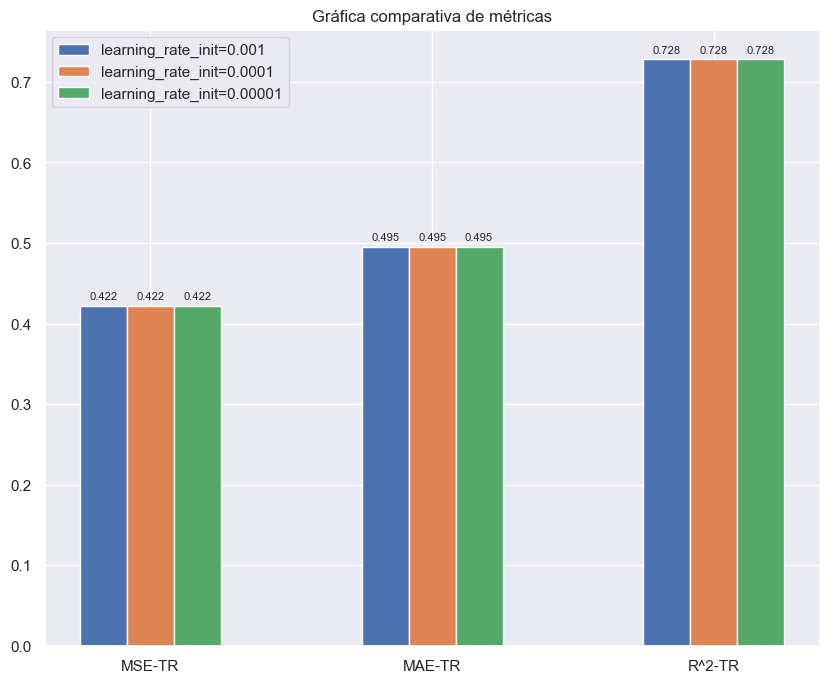

In [30]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=9.485034506695417, hidden_layer_sizes=(29), learning_rate_init=0.001, solver='lbfgs', early_stopping=True)
model_2 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=9.485034506695417, hidden_layer_sizes=(29), learning_rate_init=0.0001, solver='lbfgs', early_stopping=True)
model_3 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=9.485034506695417, hidden_layer_sizes=(29), learning_rate_init=0.00001, solver='lbfgs', early_stopping=True)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2, result3))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['learning_rate_init=0.001', 'learning_rate_init=0.0001', 'learning_rate_init=0.00001']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Exactamente los mismos reslutados, por lo que dejaré en 0,001.

Concluimos en que el usar solo jugadores de una posición en concreto no es determinante a la hora de mejorar los resultados del modelo.

Siendo MLP el modelo que mejores resultados nos da, vamos a estudiar la calidad de sus predicciones, tal vez aunque el coeficiente de determinación sea similar al anterior estudio, al no haber entrenado con porteros puede que el margen de error en cada predicción de salario sea menor.

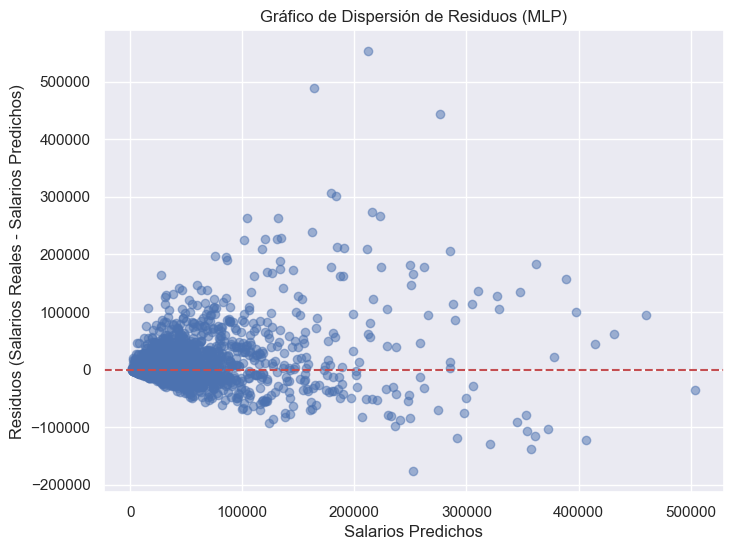

Salarios sobreestimados:
641

Salarios infraestimados:
612

Salarios normales:
793


In [82]:
# Comprobamos calidad de las predicciones de MLP
model = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=9.485034506695417, hidden_layer_sizes=(29), learning_rate_init=0.001, solver='lbfgs', early_stopping=True)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(x_train_pca.to_numpy(), y_train_log.to_numpy())

# Evaluar el desempeño del modelo en el conjunto de entrenamiento
y_pred = model.predict(x_train_pca.to_numpy())

y_pred_ori = np.expm1(y_pred)
y_train = np.expm1(y_train_log)

# Calcula los residuos
residuos = y_train - y_pred_ori

# Crea un gráfico de dispersión de los residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ori, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', label='Residuo perfecto')
plt.title('Gráfico de Dispersión de Residuos (MLP)')
plt.xlabel('Salarios Predichos')
plt.ylabel('Residuos (Salarios Reales - Salarios Predichos)')
plt.grid(True)
plt.show()

# Identifica salarios sobreestimados e infraestimados
porcentaje_error = 0.3
error = porcentaje_error * y_train

salarios_sobreestimados = y_train[residuos < -error]
salarios_infraestimados = y_train[residuos > error]
salarios_normales = y_train[(residuos <= error) & (residuos >= -error)]

print("Salarios sobreestimados:")
print(salarios_sobreestimados.shape[0])

print("\nSalarios infraestimados:")
print(salarios_infraestimados.shape[0])

print("\nSalarios normales:")
print(salarios_normales.shape[0])

Al final teniendo en cuenta que tenemos menos datos por la falta de los porteros los resultados de las predicciones en train son similares a las del anterior estudio. 